## Scratch MLP

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Setting the parameters

W1 is the weight of the hidden layer with size 3x2 (number of neurons in hidden and input layer respectively)

W2 is the weight of the output layer with size 2x3 (number of neurons in output and hidden layer respectively)


b1 is the bias in the hidden layer (3x1)

b2 is the bias in the output layer (2x1)

For initialisation, I have used **he initialization**

In [2]:
def setParameters(X, Y, hidden_size):
  np.random.seed(3)
  input_size = X.shape[0] # number of neurons in input layer
  output_size = Y.shape[0] # number of neurons in output layer.
  W1 = np.random.randn(hidden_size, input_size)*np.sqrt(2/input_size) # random initialisation 
  b1 = np.zeros((hidden_size, 1))
  W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size) # random initialisation 
  b2 = np.zeros((output_size, 1))
  params = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
  return params

### Forward Propagation 

This is the simple forward propagation step. 

We are storing {‘Z1’: Z1, ‘Z2’: Z2, ‘A1’: A1, ‘y’: y}

Because we will use them when back-propagating.

In [3]:
def f2(v):
    return (1 / (1 + np.exp(-v)))

In [4]:
def forwardPropagation(X, params):
  '''
  X: input
  params: The dictionary storing Weights and biases
  '''
  Z1 = np.dot(params['W1'], X)+params['b1']
  A1 = np.tanh(Z1) # this is the f1 function or the tanh(v)
  Z2 = np.dot(params['W2'], A1)+params['b2']
  y = f2(Z2) # this is the f2 function as defined
  return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

### Cost function

We update our parameters and find the best parameter that gives us the minimum possible cost. We are using the famous **cross entropy cost function** used for classification purpose.

In [5]:
def cost(predict, actual):
  m = actual.shape[1]
  cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
  return np.squeeze(cost__)

### Backpropagation

We’ve found the cost, now is the time for the most important step that is Backpropagation.

We will be caching and returning the gradients that will be used for updating the weights

In [6]:
def backPropagation(X, Y, params, cache):
  m = X.shape[1]
  dy = cache['y'] - Y
  dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
  db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
  dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
  dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
  return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

### Update weights

Now that we have our derivatives using backpropagation, we can update the weights and biases

We will be using a default learning rate of 1.0

In [7]:
def updateParameters(gradients, params, learning_rate = 1.0):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

### Fitting the model

We need to run many interations (or epochs) to find the parameters that return the minimum cost. We will do it using loops.

`Hidden_size` means the number of neurons in the hidden layer. It is a hyperparameter.

In [8]:
def fit(X, Y, learning_rate, hidden_size, number_of_iterations = 5000):
  params = setParameters(X, Y, hidden_size)
  cost_ = []
  for j in range(number_of_iterations):
    y, cache = forwardPropagation(X, params)
    costit = cost(y, Y)
    gradients = backPropagation(X, Y, params, cache)
    params = updateParameters(gradients, params, learning_rate)
    cost_.append(costit)
  return params, cost_

### Execution

We will try our code on **make_moons dataset** (well known classification dataset) of sklearn

In [9]:
import sklearn.datasets
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=.2)
X, Y = X.T, Y.reshape(1, Y.shape[0])

In [10]:
X.shape, Y.shape

((2, 500), (1, 500))

Let us also convert output to 2 dimensional as per the requirements using one hot encoding

In [11]:
Y_1hot = np.zeros((2, Y.shape[1]))
for i in range(len(Y[0])):
  Y_1hot[Y[0][i], i] = 1

In [12]:
params, cost_ = fit(X, Y_1hot, 0.3, 3, 5000)

### Plotting the cost function

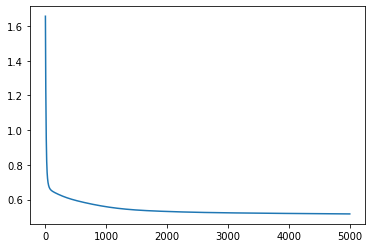

In [13]:
import matplotlib.pyplot as plt
plt.plot(cost_)

### It has successfully converged! We have successfully built the MLP model

### Q2

MLP using Tensorflow

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

### Using Tensorflow we are now developing a model. We will add hidden and output layer to it.

In [15]:
model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
history = model.fit(X.T, Y_1hot.T, epochs=100, verbose=2)

Epoch 1/100
16/16 - 12s - loss: 0.7286
Epoch 2/100
16/16 - 0s - loss: 0.7076
Epoch 3/100
16/16 - 0s - loss: 0.6882
Epoch 4/100
16/16 - 0s - loss: 0.6701
Epoch 5/100
16/16 - 0s - loss: 0.6535
Epoch 6/100
16/16 - 0s - loss: 0.6382
Epoch 7/100
16/16 - 0s - loss: 0.6238
Epoch 8/100
16/16 - 0s - loss: 0.6103
Epoch 9/100
16/16 - 0s - loss: 0.5974
Epoch 10/100
16/16 - 0s - loss: 0.5851
Epoch 11/100
16/16 - 0s - loss: 0.5737
Epoch 12/100
16/16 - 0s - loss: 0.5626
Epoch 13/100
16/16 - 0s - loss: 0.5526
Epoch 14/100
16/16 - 0s - loss: 0.5425
Epoch 15/100
16/16 - 0s - loss: 0.5334
Epoch 16/100
16/16 - 0s - loss: 0.5247
Epoch 17/100
16/16 - 0s - loss: 0.5164
Epoch 18/100
16/16 - 0s - loss: 0.5083
Epoch 19/100
16/16 - 0s - loss: 0.5008
Epoch 20/100
16/16 - 0s - loss: 0.4934
Epoch 21/100
16/16 - 0s - loss: 0.4867
Epoch 22/100
16/16 - 0s - loss: 0.4801
Epoch 23/100
16/16 - 0s - loss: 0.4739
Epoch 24/100
16/16 - 0s - loss: 0.4678
Epoch 25/100
16/16 - 0s - loss: 0.4621
Epoch 26/100
16/16 - 0s - loss: 0

### We obtained a final converged loss of 0.28.